<a href="https://colab.research.google.com/github/mlacasa/InferenciaBayesiana/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import plotly.graph_objs as go
import numpy as np
import pandas as pd


# Cargamos los datos para evaluar el coeficiente de Correlación

In [56]:
## creamos los datos

Xmetros = np.arange(0,5,0.001)
Pendiente = 2.5


Yprecio = Xmetros * Pendiente
Yprecio1 = []
for num in Xmetros:
  Yprecio1.append(num * Pendiente + 5 + np.random.uniform(-2,2))

Yprecio2 = []
for num in Xmetros:
  Yprecio2.append(num * Pendiente + 15 + np.random.normal(-2,2))

trace0 = go.Scatter(x = Xmetros, y = Yprecio , mode = 'markers', name= '0.5x')
trace1 = go.Scatter(x = Xmetros, y = Yprecio1 , mode = 'markers', name= '0.5x+uniform')
trace2 = go.Scatter(x = Xmetros, y = Yprecio2 , mode = 'markers', name= '0.5x+normal')

data = [trace0, trace1, trace2]

layout = go.Layout(title='Ejemplo Datos Alta correlación')
fig = go.Figure(data = data, layout = layout )
#pyo.plot(fig)
fig.show()

In [36]:
np.corrcoef(Xmetros, Yprecio)

array([[1., 1.],
       [1., 1.]])

In [57]:
np.corrcoef(Xmetros, Yprecio1)

array([[1.        , 0.95249805],
       [0.95249805, 1.        ]])

In [58]:
np.corrcoef(Xmetros, Yprecio2)

array([[1.        , 0.87393942],
       [0.87393942, 1.        ]])

In [59]:
import statsmodels.api as sm                # Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf       # Permite ajustar modelos estadísticos utilizando fórmulas de estilo R

df = pd.DataFrame(list(zip(Xmetros, Yprecio, Yprecio1, Yprecio2)), columns= ['metros', 'sinRuido', 'uniform', 'Normal'])

In [60]:
df.head()

,metros,sinRuido,uniform,Normal
0,0.000,0.0000,5.637314,11.630953
1,0.001,0.0025,6.875696,15.832578
2,0.002,0.0050,3.631328,17.315219
3,0.003,0.0075,6.274589,11.212537
4,0.004,0.0100,3.234190,14.091574


In [61]:
X = sm.add_constant(df['metros']) # Añado la variable X
y = df['sinRuido']

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df)
#y_std = scaler.transform(y)

In [63]:
mod = sm.OLS(y, X).fit()              # sm.OLS(respuesta, entrada)
predictions = mod.predict(X)
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:               sinRuido   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.062e+34
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:18:27   Log-Likelihood:             1.6273e+05
No. Observations:                5000   AIC:                        -3.254e+05
Df Residuals:                    4998   BIC:                        -3.254e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.776e-15   5.02e-17     35.354      0.0

In [64]:
y1 = df['uniform']

mod = sm.OLS(y1, X).fit()              # sm.OLS(respuesta, entrada)
predictions = mod.predict(X)
print(mod.summary())



                            OLS Regression Results                            
Dep. Variable:                uniform   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 4.889e+04
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:18:35   Log-Likelihood:                -7808.1
No. Observations:                5000   AIC:                         1.562e+04
Df Residuals:                    4998   BIC:                         1.563e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0063      0.033    153.456      0.0

In [65]:
y2 = df['Normal']

mod = sm.OLS(y2, X).fit()              # sm.OLS(respuesta, entrada)
predictions = mod.predict(X)
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Normal   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                 1.616e+04
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:18:44   Log-Likelihood:                -10561.
No. Observations:                5000   AIC:                         2.113e+04
Df Residuals:                    4998   BIC:                         2.114e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0155      0.057    230.048      0.0

# Ejemplo con la datset Boston

In [66]:
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = boston.target
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [67]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [69]:
# Analizamos 2 variables categóricas: CHAS (casa con vista al río) y RAD (acceso a la via del tren)
df['CHAS'] = df['CHAS'].astype('category')
df['RAD'] = df['RAD'].astype('category')

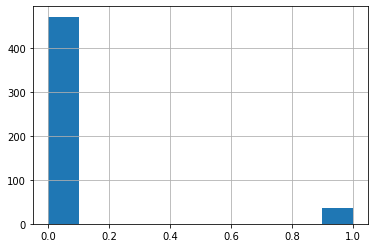

In [70]:
df['CHAS'].hist()

In [71]:
df.groupby('CHAS').mean()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
CHAS,,,,,,,,,,,,
0.0,3.744447,11.634820,11.019193,0.551817,6.267174,67.911677,3.851915,409.870488,18.527176,355.461040,12.757941,22.093843
1.0,1.851670,7.714286,12.719143,0.593426,6.519600,77.500000,3.029709,386.257143,17.491429,372.997429,11.241714,28.440000


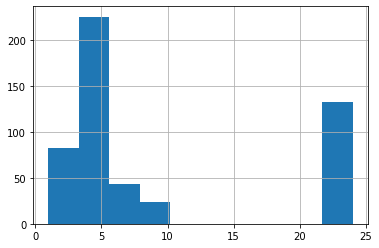

In [72]:
df['RAD'].hist()

In [ ]:
df.groupby('RAD').mean()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
RAD,,,,,,,,,,,,
1.0,0.036029,39.900000,5.066000,0.462890,6.555850,45.025000,6.027825,291.450000,17.565000,389.273000,7.370000,24.365000
2.0,0.083285,20.416667,9.630833,0.484917,6.649958,64.770833,4.097008,260.666667,17.291667,386.413750,10.024583,26.833333
3.0,0.097359,16.381579,4.418947,0.452424,6.473026,49.310526,5.146492,246.078947,18.168421,392.417895,9.076053,27.928947
4.0,0.393903,14.731818,10.746636,0.504311,6.133118,60.841818,4.433000,335.981818,19.136364,382.721273,12.199091,21.387273
5.0,0.687792,11.108696,9.759826,0.570883,6.393157,69.223478,3.697329,331.843478,16.546957,369.192435,10.657217,25.706957
6.0,0.150054,12.980769,8.198077,0.514846,6.104731,60.142308,4.024915,372.884615,17.815385,387.366538,12.305769,20.976923
7.0,0.150399,26.705882,5.034706,0.441000,6.647765,40.141176,6.495859,304.411765,18.405882,388.432941,7.988235,27.105882
8.0,0.371410,6.250000,5.932500,0.492500,6.950792,67.350000,4.410604,301.250000,17.975000,385.277500,7.960833,30.358333
24.0,12.759291,0.000000,18.100000,0.672417,6.022152,89.805303,2.061254,666.000000,20.200000,288.089167,18.600606,16.403788


In [73]:
# Del resto de variables, al ser contínuas, evaluamos su índice de correlación por Pearson

from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

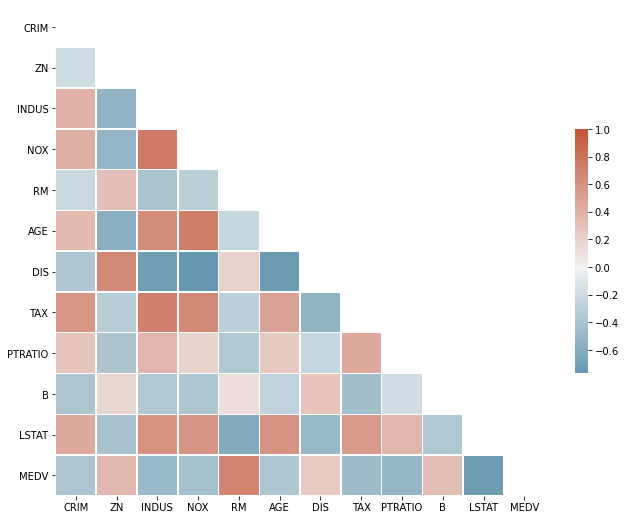

In [74]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [75]:
# Existe un alto índice de correlación
np.linalg.det(corr)

0.0002929642806467698

In [76]:
# Preparamos el modelo

X = sm.add_constant(df.iloc[:,:-1]) # Añado la variable X
y = df['MEDV']

In [77]:
mod = sm.OLS(y, X).fit()              # sm.OLS(respuesta, entrada)
predictions = mod.predict(X)
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 15 Aug 2021   Prob (F-statistic):          6.72e-135
Time:                        13:44:17   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [78]:
# Buscamos un modelo más robusto.
# Calculamos el valor del VIF (VAriance Inflation Factor), como de correlacionados están los valores entre ellos.
# A valor muy alto > 5 recondiserar su análisis

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = df.iloc[:,:-1].columns
vif['VIF'] = [variance_inflation_factor(df.iloc[:,:-1].values, i) for i in range(df.iloc[:,:-1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,PTRATIO,85.03
5,RM,77.95
4,NOX,73.89
9,TAX,61.23
6,AGE,21.39
11,B,20.10
8,RAD,15.17
7,DIS,14.70
2,INDUS,14.49
12,LSTAT,11.10


De los valores altos, estudiamos qué valores aparecen con p-values muy altos, como son: 

INDUS    0.738   \
AGE      0.958 

INDUS tiene una correlación altísima com NOX (a más industrialización, más polución), y AGE, curiosamente, también. El modelo indica una multicolinearidad y reduce potencia al modelo. Eliminamos estas dos variables del modelo.


In [79]:
cols = df.columns
df1 = df[['CRIM', 'ZN',  'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']]

In [80]:
# Y volvemos a ejecutar la regresión

X = sm.add_constant(df1.iloc[:,:-1]) # Añado la variable X
y = df['MEDV']

mod = sm.OLS(y, X).fit()              # sm.OLS(respuesta, entrada)
predictions = mod.predict(X)
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 15 Aug 2021   Prob (F-statistic):          5.54e-137
Time:                        13:45:59   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.0

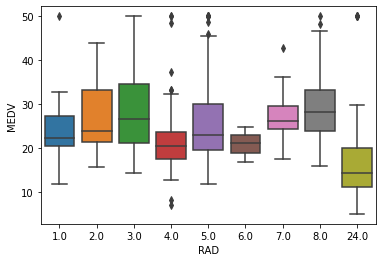

In [81]:
# También observamos anteriormente la diferencia entre el precio para valores RAD altos. Vayamos a dibujar la relación

sns.boxplot(data=df1, x='RAD', y = 'MEDV')

In [82]:
# Eliminamos los registros con valor = 24

df1 = df1[df1['RAD'] != 24]

In [83]:
df.shape[0] # número de registros inicial

506

In [84]:
df1.shape[0] # num registros quitando RAD = 24

374

In [85]:
# Y volvemos a ejecutar la regresión

X = sm.add_constant(df1.iloc[:,:-1]) # Añado la variable X
y = df1['MEDV']
mod = sm.OLS(y, X).fit()              # sm.OLS(respuesta, entrada)
predictions = mod.predict(X)
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     194.6
Date:                Sun, 15 Aug 2021   Prob (F-statistic):          1.56e-144
Time:                        13:47:03   Log-Likelihood:                -965.57
No. Observations:                 374   AIC:                             1955.
Df Residuals:                     362   BIC:                             2002.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.4366      4.797     -2.176      0.0